In [61]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [63]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])

In [64]:
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [65]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy() 
#ho creato un nuovo data drame preso dal data frame originale filtrato per titolo di lavoro, quindi nel nuovo data frame c'è solo il data analyst

In [66]:
df_DA.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


In [67]:
df_DA['job_posted_month_num'] = df_DA.job_posted_date.dt.month
#ho creato una nuova colonna 'job_posted_date_num' dove viene visualizzato il mese in cui è stato pubblicato annuncio.

In [68]:
df_DA.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_num
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2


In [69]:
df_DA_explode = df_DA.explode('job_skills')

In [70]:
df_DA_explode.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_num
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,tableau,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,sql,"{'analyst_tools': ['excel', 'power bi', 'sap']...",12
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,php,"{'analyst_tools': ['excel', 'power bi', 'sap']...",12
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,excel,"{'analyst_tools': ['excel', 'power bi', 'sap']...",12
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,power bi,"{'analyst_tools': ['excel', 'power bi', 'sap']...",12


In [71]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)
#ho creato una tabella-pivot che come indice ha il numero di mese in cui è stato pubblicato l'annuncio, come colonna invece ha quante volte lo skill è stato richiesto tra le competenze. 

In [72]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
#è possibile creare una nuova riga in data frame utilizzando il loc[]: quindi ho creato riga 'Total' dove come il valore risulta il totale della colonna

In [73]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [74]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [75]:
df_DA_pivot = df_DA_pivot.drop(index='Total') 
#cancellato index 'Total' perché serviva solo per sort le skill più richieste per mese

In [76]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_DA_pivot = df_DA_pivot.reset_index() #viene cancellato index come il numero del mese quindi si crea una nuova colonna in automatico con index di default

In [109]:
df_DA_pivot

job_skills,index,job_posted_month_num,sql,excel,python,tableau,power bi,r,sas,powerpoint,...,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess,job_posted_month
0,0,1,11336,8170,6606,5596,4285,3607,3830,1880,...,0,0,1,0,0,0,1,0,0,Jan
1,1,2,7947,5772,4751,3936,3307,2576,2634,1291,...,0,0,0,0,0,0,0,0,0,Feb
2,2,3,7868,5675,4741,4051,3176,2650,2554,1266,...,1,0,0,0,0,1,0,0,0,Mar
3,3,4,7553,5496,4557,3776,3106,2399,2598,1190,...,0,0,0,1,0,0,0,0,0,Apr
4,4,5,6617,4773,4070,3245,2695,2093,1940,979,...,0,0,0,0,0,0,0,0,1,May
5,5,6,7584,5724,4707,3812,3275,2442,2174,1173,...,0,0,0,0,0,0,0,0,0,Jun
6,6,7,7687,5513,4831,3928,3350,2444,2118,1096,...,0,1,0,0,0,0,0,0,0,Jul
7,7,8,8823,6482,5576,4533,3859,2975,2560,1332,...,0,0,0,0,0,0,0,0,0,Aug
8,8,9,6829,4886,4229,3446,3118,2146,1880,944,...,0,0,0,0,0,0,0,0,0,Sep
9,9,10,7474,5217,4693,3709,3340,2380,2114,955,...,1,0,0,0,0,0,0,0,0,Oct


In [1]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_num'].apply(lambda month: pd.to_datetime(month, format='%m').strftime('%b'))
#viene creata una nuova colonna 'job_posted_month' dove si pprende il numero di mese ed viene trasformato il nome: da numero del mese diventa 'Jan', 'Feb', etc
df_DA_pivot


NameError: name 'df_DA_pivot' is not defined

In [108]:
df_DA_pivot = df_DA_pivot.drop('level_0', axis=1) #questo cancella la colonna 'level_0': bisognaa indicare axis = 1 se si tratta di colonne e axis = 0 se si tratta di righe
df_DA_pivot

job_skills,index,job_posted_month_num,sql,excel,python,tableau,power bi,r,sas,powerpoint,...,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess,job_posted_month
0,0,1,11336,8170,6606,5596,4285,3607,3830,1880,...,0,0,1,0,0,0,1,0,0,Jan
1,1,2,7947,5772,4751,3936,3307,2576,2634,1291,...,0,0,0,0,0,0,0,0,0,Feb
2,2,3,7868,5675,4741,4051,3176,2650,2554,1266,...,1,0,0,0,0,1,0,0,0,Mar
3,3,4,7553,5496,4557,3776,3106,2399,2598,1190,...,0,0,0,1,0,0,0,0,0,Apr
4,4,5,6617,4773,4070,3245,2695,2093,1940,979,...,0,0,0,0,0,0,0,0,1,May
5,5,6,7584,5724,4707,3812,3275,2442,2174,1173,...,0,0,0,0,0,0,0,0,0,Jun
6,6,7,7687,5513,4831,3928,3350,2444,2118,1096,...,0,1,0,0,0,0,0,0,0,Jul
7,7,8,8823,6482,5576,4533,3859,2975,2560,1332,...,0,0,0,0,0,0,0,0,0,Aug
8,8,9,6829,4886,4229,3446,3118,2146,1880,944,...,0,0,0,0,0,0,0,0,0,Sep
9,9,10,7474,5217,4693,3709,3340,2380,2114,955,...,1,0,0,0,0,0,0,0,0,Oct


In [125]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_num'].apply(lambda month: pd.to_datetime(month, format='%m').strftime('%b'))
#con questo viene creata una nuova colonna 'job_posted_month' che prende la colonna con il numero del mese e lo trasforma da cifre al 'Jen', 'Feb', etc
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
#imposta come index del data frame la colonna 'job_posted_month'
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_num')
#drop colonna un altro metodo senza indicare axis
df_DA_pivot

job_skills,index,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,2,0,0,1,0,0,0,1,0,0
Feb,1,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
Mar,2,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,0,1,0,0,0,0,1,0,0,0
Apr,3,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,1,0,0,0,0,0
May,4,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,0,1
Jun,5,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
Jul,6,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
Aug,7,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
Sep,8,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df_DA_pivot = df_DA_pivot.drop('index', axis=1) #drop index colonna
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


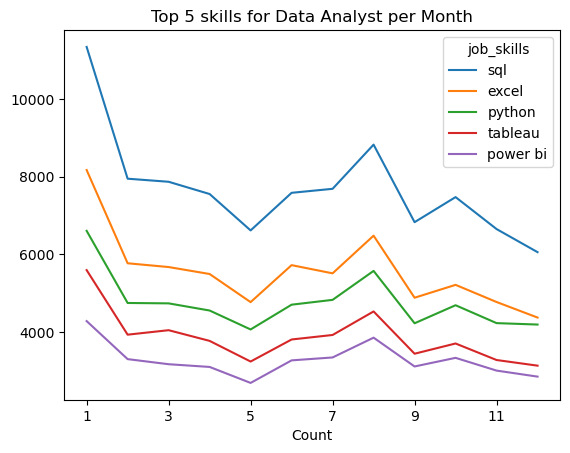

In [79]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analyst per Month')
plt.xlabel('Count')
plt.ylabel('')
plt.show()
#con il loc ho impostato il filter che comprende tutte le righe e solo prime 6 colonne